# Create a Graph Manually

In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
G.add_node(1)
G.add_nodes_from([2, 3])

In [3]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)

In [4]:
G.add_edges_from([(1, 2), (1, 3)])

## Display the Graph

In [5]:
import matplotlib.pyplot as plt

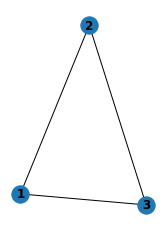

In [6]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

# Create Graphs Using Generators

In [8]:
er = nx.erdos_renyi_graph(30, 0.15)

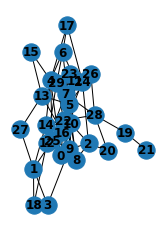

In [9]:
subax1 = plt.subplot(121)
nx.draw(er, with_labels=True, font_weight='bold')

In [10]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)

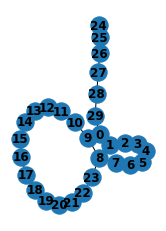

In [11]:
subax1 = plt.subplot(121)
nx.draw(ws, with_labels=True, font_weight='bold')

In [12]:
ba = nx.barabasi_albert_graph(30, 5)

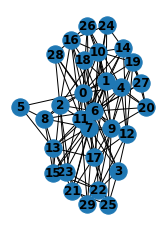

In [13]:
subax1 = plt.subplot(121)
nx.draw(ba, with_labels=True, font_weight='bold')

# Analyze Network Structure

## Erdos-Renyi Random Graph

In [14]:
sorted(d for n, d in er.degree())

[1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 8]

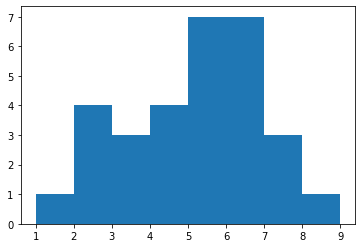

In [15]:
    degrees = [er.degree(n) for n in er.nodes()]
    max_degrees = max(degrees)
    min_degrees = min(degrees) # or 0
    bins    = range(min_degrees, max_degrees + 2)
    plt.xticks(range(max_degrees+2))
    plt.hist(degrees, bins=bins)
    plt.show()

In [16]:
nx.clustering(er)

{0: 0.3333333333333333,
 1: 0.1,
 2: 0.3,
 3: 0.3333333333333333,
 4: 0.047619047619047616,
 5: 0.06666666666666667,
 6: 0.3,
 7: 0.2,
 8: 0.26666666666666666,
 9: 0.23809523809523808,
 10: 0.2857142857142857,
 11: 0.3333333333333333,
 12: 0.2,
 13: 0,
 14: 0.2,
 15: 0,
 16: 0,
 17: 0.3333333333333333,
 18: 0.3333333333333333,
 19: 0,
 20: 0,
 21: 0,
 22: 0.26666666666666666,
 23: 0.4,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0.23809523809523808}

In [17]:
nx.average_clustering(er)

0.15920634920634924

In [18]:
nx.density(er)

0.16091954022988506

In [19]:
nx.average_shortest_path_length(er)

2.425287356321839

## Watts-Strogatz Small World Graph

In [20]:
sorted(d for n, d in ws.degree())

[1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3]

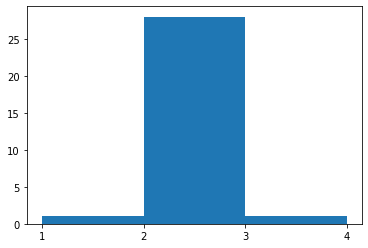

In [21]:
    ws_degrees = [ws.degree(n) for n in ws.nodes()]
    max_degrees = max(ws_degrees)
    min_degrees = min(ws_degrees) # or 0
    bins    = range(min_degrees, max_degrees + 2)
    plt.xticks(range(max_degrees+2))
    
    plt.hist(ws_degrees, bins=bins)
    plt.show()

In [22]:
nx.clustering(ws)

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0}

In [23]:
nx.average_clustering(ws)

0.0

In [24]:
nx.density(ws)

0.06896551724137931

In [25]:
nx.average_shortest_path_length(ws)

8.144827586206896

## Barabasi-Albert Preferential Attachment Graph

In [26]:
sorted(d for n, d in ba.degree())

[3,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 8,
 8,
 9,
 9,
 9,
 10,
 11,
 12,
 14,
 17,
 18,
 23]

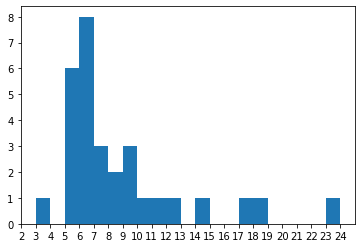

In [27]:
    ba_degrees = [ba.degree(n) for n in ba.nodes()]
    
    
    
    max_degrees = max(ba_degrees)
    min_degrees = min(ba_degrees) # or 0
    bins    = range(min_degrees, max_degrees + 2)

    plt.xticks(range(max_degrees+2))

    plt.hist(ba_degrees, bins=bins)
    plt.show()

In [28]:
nx.clustering(ba)

{0: 0.3006535947712418,
 1: 0.4090909090909091,
 2: 0.4,
 3: 0.5333333333333333,
 4: 0.6071428571428571,
 5: 0.6666666666666666,
 6: 0.26877470355731226,
 7: 0.3088235294117647,
 8: 0.6190476190476191,
 9: 0.37362637362637363,
 10: 0.5,
 11: 0.34545454545454546,
 12: 0.4166666666666667,
 13: 0.3611111111111111,
 14: 0.5333333333333333,
 15: 0.6,
 16: 0.5238095238095238,
 17: 0.3333333333333333,
 18: 0.7,
 19: 0.35714285714285715,
 20: 0.6,
 21: 0.4,
 22: 0.42857142857142855,
 23: 0.26666666666666666,
 24: 0.4,
 25: 0.4,
 26: 0.5333333333333333,
 27: 0.4,
 28: 0.7,
 29: 0.5}

In [29]:
nx.average_clustering(ba)

0.4595527462023626

In [30]:
nx.average_shortest_path_length(ba)

1.7540229885057472

# Import Graphs

## From .txt

In [ ]:
import sys, math

In [ ]:
%pylab inline

In [ ]:
import collections as col

In [ ]:
links_out = col.defaultdict(list)
print(links_out)

In [ ]:
filepath =

## Les Miserables

## Francis Bacon

## CollegeMsg

# Analyze Imported Graphs

# Run PolyGraphs Simulations